In [1]:
import pandas as pd
df = pd.read_csv('/Users/vanhome/Downloads/EEG.machinelearing_data_BRMH.csv')
print(df.head)

import numpy as np
data_array = df.to_numpy()
np.save('data_array.npy', data_array)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<bound method NDFrame.head of      no. sex   age    eeg.date  education     IQ       main.disorder  \
0      1   M  57.0   2012.8.30        NaN    NaN  Addictive disorder   
1      2   M  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2      3   M  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3      4   M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4      5   M  36.0  2012.10.18       16.0  112.0  Addictive disorder   
..   ...  ..   ...         ...        ...    ...                 ...   
940  941   M  22.0   2014.8.28       13.0  116.0     Healthy control   
941  942   M  26.0   2014.9.19       13.0  118.0     Healthy control   
942  943   M  26.0   2014.9.27       16.0  113.0     Healthy control   
943  944   M  24.0   2014.9.20       13.0  107.0     Healthy control   
944  945   M  21.0  2015.10.23       13.0  105.0     Healthy control   

        specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  \
0    Alcohol use disorder         3

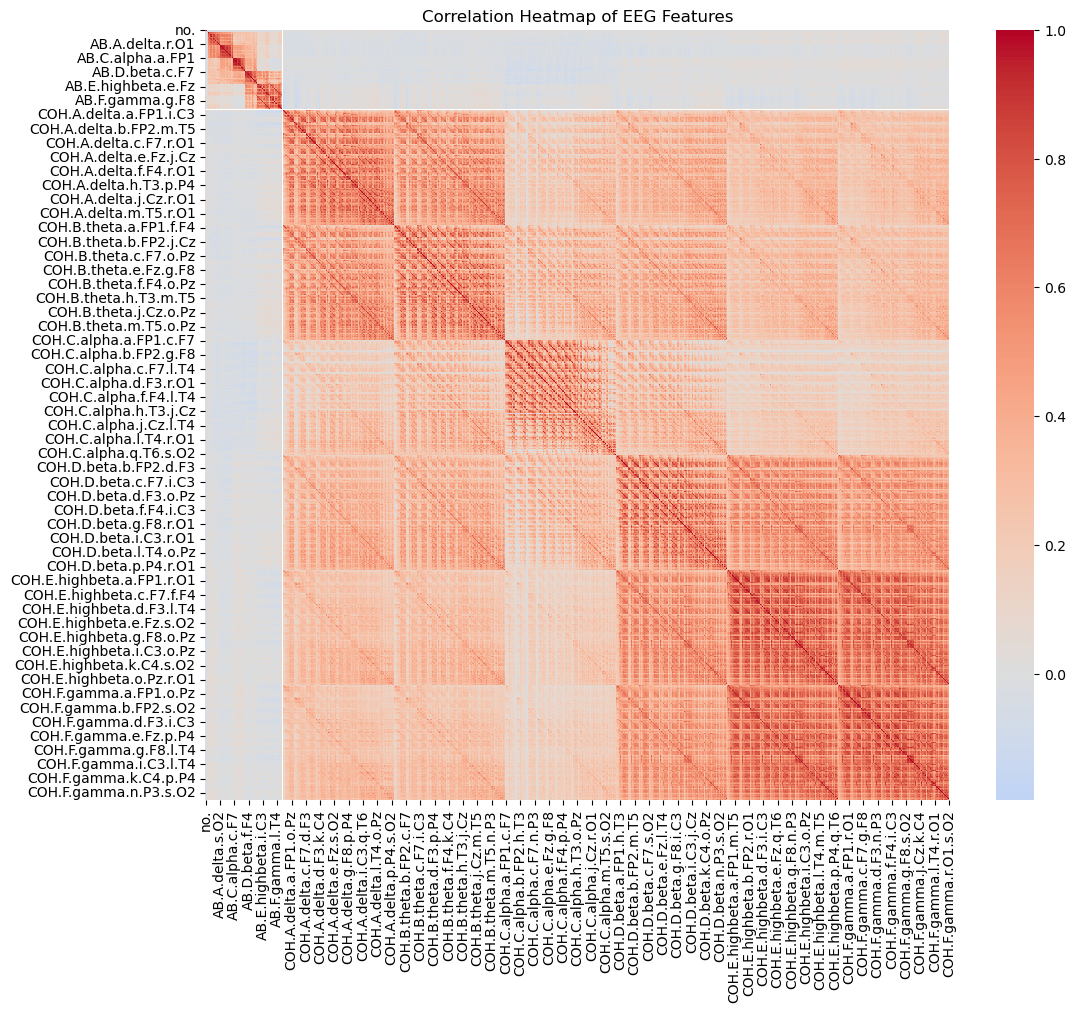

In [2]:
eeg_features = df.select_dtypes(include='number')

plt.figure(figsize=(12, 10))
sns.heatmap(eeg_features.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of EEG Features')
plt.show()

In [3]:
# Calculate correlation matrix and find strong pairs
corr_matrix = df.select_dtypes(include='number').corr().abs()

# Find pairs with correlation > 0.95 (excluding self-correlations)
high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
    .rename(columns={0: 'correlation', 'level_0': 'feature_1', 'level_1': 'feature_2'})
)

print(high_corr_pairs.sort_values(by='correlation', ascending=False).head(100))

                     feature_1               feature_2  correlation
47145         AB.C.alpha.a.FP1        AB.C.alpha.b.FP2     0.993751
470493   COH.C.alpha.e.Fz.r.O1   COH.C.alpha.f.F4.r.O1     0.989353
51543          AB.C.alpha.e.Fz         AB.C.alpha.f.F4     0.989344
431701  COH.C.alpha.a.FP1.s.O2  COH.C.alpha.b.FP2.s.O2     0.989103
471098   COH.C.alpha.e.Fz.s.O2   COH.C.alpha.f.F4.s.O2     0.987893
...                        ...                     ...          ...
427011  COH.C.alpha.a.FP1.l.T4  COH.C.alpha.b.FP2.l.T4     0.966623
431717  COH.C.alpha.a.FP1.s.O2   COH.C.alpha.c.F7.s.O2     0.966331
641393  COH.F.gamma.a.FP1.o.Pz  COH.F.gamma.a.FP1.p.P4     0.965901
552784    COH.D.beta.d.F3.q.T6    COH.D.beta.e.Fz.q.T6     0.965732
51547          AB.C.alpha.e.Fz         AB.C.alpha.j.Cz     0.965526

[100 rows x 3 columns]



Removed 209 highly correlated features.
Remaining features: 940 columns


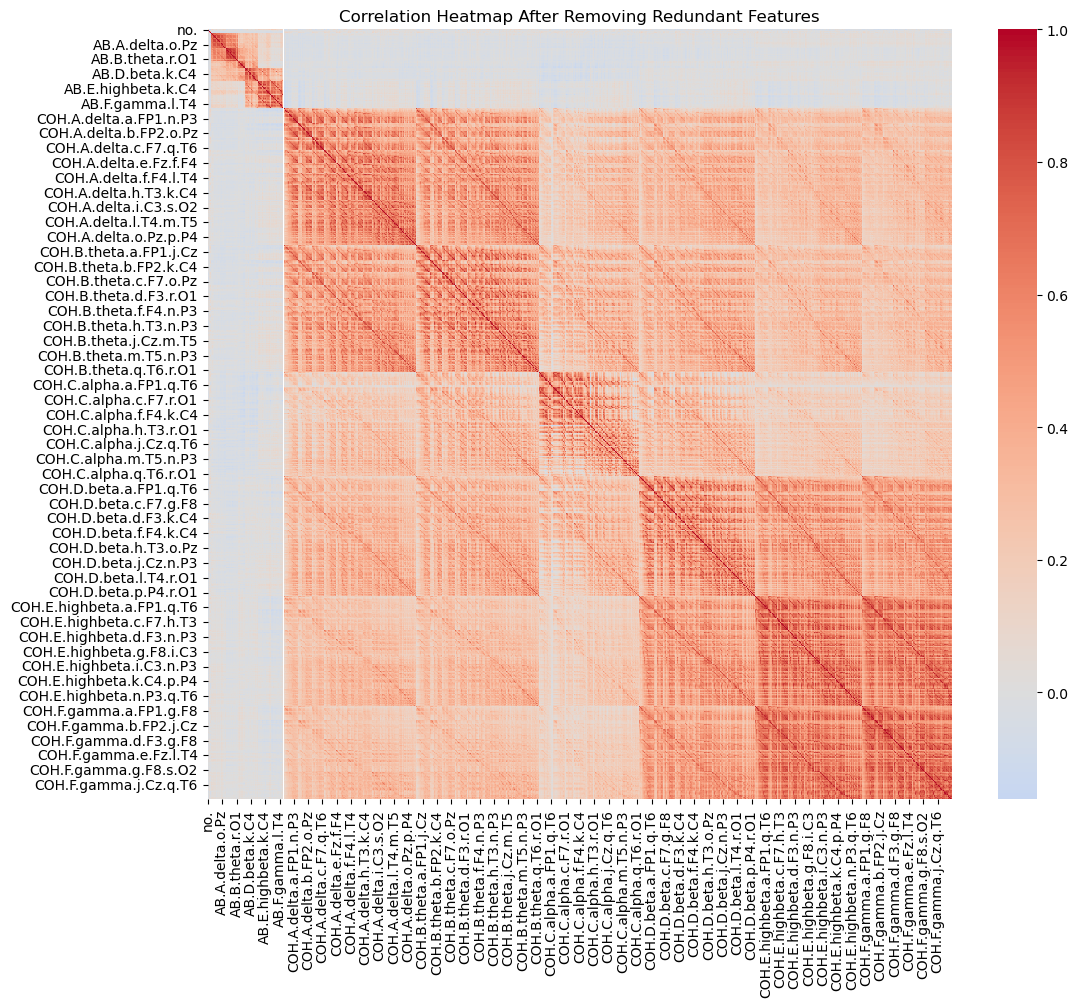

In [4]:
# Create a set to store columns to drop
columns_to_drop = set()

# Iterate through high correlation pairs and mark one column from each pair
for _, row in high_corr_pairs.iterrows():
    feature_1 = row['feature_1']
    feature_2 = row['feature_2']
    corr_value = row['correlation']
    if corr_value > 0.95:
        # Prefer to keep the first feature, drop the second
        if feature_2 not in columns_to_drop:
            columns_to_drop.add(feature_2)

# Drop the redundant columns
df_reduced = df.drop(columns=list(columns_to_drop))

print(f"\nRemoved {len(columns_to_drop)} highly correlated features.")
print(f"Remaining features: {df_reduced.shape[1]} columns")

# Plot heatmap again to verify reduced redundancy
plt.figure(figsize=(12, 10))
sns.heatmap(df_reduced.select_dtypes(include='number').corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap After Removing Redundant Features')
plt.show()